In [1]:
import pandas as pd 
from selenium import webdriver 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC

In [27]:
driver = webdriver.Chrome('/Users/W I N D O W S/Jupyter Notebook/chromedriver/chromedriver')
wait = WebDriverWait(driver,5)

/var/folders/t2/xnsht2xs5tl26mtkcfltm8gc0000gn/T/ipykernel_40408/3669598407.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/W I N D O W S/Jupyter Notebook/chromedriver/chromedriver')


In [33]:
links = []
for page in range(800,951,50):
        driver.get('https://myanimelist.net/topanime.php?type=bypopularity&limit=' + str(page)) 
        link = driver.find_elements(By.CSS_SELECTOR, 'div[class="detail"] h3 a')
        for item in link:
            links.append(item.get_attribute('href'))

In [34]:
titles = []
genres = []
episodes = [] 
durations = [] 
scores = [] 
producers = []
ratings = []
licensors = []

for item_link in links:
    try:
        driver.get(item_link)
        title = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR,'div[class="h1-title"]')))
        score = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR,'div[class*="score-label"]')))
        duration = wait.until(EC.visibility_of_element_located((By.XPATH,'//*[contains(text(),"Duration:")]/parent::div')))
        producer = wait.until(EC.visibility_of_element_located((By.XPATH,'//*[contains(text(),"Producers:")]/parent::div')))
        episode = wait.until(EC.visibility_of_element_located((By.XPATH,'//*[contains(text(),"Episodes:")]/parent::div')))
        genre = wait.until(EC.visibility_of_element_located((By.XPATH,'//*[contains(text(),"Genre")]/parent::div')))
        rating = wait.until(EC.visibility_of_element_located((By.XPATH,'//*[contains(text(),"Rating:")]/parent::div')))
        licensor = wait.until(EC.visibility_of_element_located((By.XPATH,'//*[contains(text(),"Licensors:")]/parent::div')))
        titles.append(title.text)
        scores.append(score.text)
        durations.append(duration.text)
        producers.append(producer.text)
        episodes.append(episode.text)
        genres.append(genre.text)
        ratings.append(rating.text)
        licensors.append(licensor.text)
    except:
        pass 
    

In [35]:
my_data = {'Title': titles, 'Genre':genres, 'Duration':durations, 'Scores':scores, 'Episodes':episodes,
           'Rating':ratings, 'Producers':producers, 'Licensors':licensors} 
df_7 = pd.DataFrame(data=my_data)

#'Aired':aired, 

In [36]:
df_7

,Title,Genre,Duration,Scores,Episodes,Rating,Producers,Licensors
0,Aharen-san wa Hakarenai,Genre: Comedy,Duration: 23 min. per ep.,7.35,Episodes: 12,Rating: PG-13 - Teens 13 or older,Producers: bilibili,"Licensors: None found, add some"
1,Mahoutsukai no Yome: Hoshi Matsu Hito\nThe Anc...,"Genres: Fantasy, Supernatural",Duration: 23 min. per ep.,8.11,Episodes: 3,Rating: PG-13 - Teens 13 or older,"Producers: Production I.G, flying DOG",Licensors: Crunchyroll
2,Bleach Movie 1: Memories of Nobody\nBleach the...,"Genres: Action, Adventure, Fantasy",Duration: 1 hr. 33 min.,7.43,Episodes: 1,Rating: PG-13 - Teens 13 or older,"Producers: TV Tokyo, Dentsu, Shueisha",Licensors: VIZ Media
3,Haibane Renmei,"Genres: Drama, Fantasy, Mystery, Slice of Life",Duration: 24 min. per ep.,7.97,Episodes: 13,Rating: PG-13 - Teens 13 or older,"Producers: Kadokawa Shoten, Fuji TV, Studio Tulip","Licensors: Funimation, Geneon Entertainment USA"
4,Kanon (2006)\nKanon,"Genres: Drama, Romance, Slice of Life, Superna...",Duration: 24 min. per ep.,7.96,Episodes: 24,Rating: PG-13 - Teens 13 or older,"Producers: Pony Canyon, TBS, Movic","Licensors: ADV Films, Funimation"
...,...,...,...,...,...,...,...,...
195,Edens Zero,"Genres: Adventure, Comedy, Fantasy, Sci-Fi",Duration: 23 min. per ep.,7.31,Episodes: 25,Rating: PG-13 - Teens 13 or older,"Producers: Kodansha, Magic Capsule, Nippon Tel...","Licensors: None found, add some"
196,Otome Game Sekai wa Mob ni Kibishii Sekai desu...,Genre: Fantasy,Duration: 23 min. per ep.,7.35,Episodes: 12,Rating: PG-13 - Teens 13 or older,"Producers: AT-X, Sammy, bilibili, Kadokawa Med...","Licensors: None found, add some"
197,Kidou Senshi Gundam 00\nMobile Suit Gundam 00,"Genres: Action, Drama, Sci-Fi",Duration: 24 min. per ep.,8.12,Episodes: 25,Rating: R - 17+ (violence & profanity),"Producers: Sotsu, Asatsu DK, Mainichi Broadcas...",Licensors: Bandai Entertainment
198,Aoi Bungaku Series,"Genres: Drama, Suspense",Duration: 23 min. per ep.,7.70,Episodes: 12,Rating: R - 17+ (violence & profanity),"Producers: Movic, Happinet Pictures, RAY","Licensors: None found, add some"


In [37]:
df_7.to_excel('output801_1000.xlsx')

In [66]:
anime = pd.read_excel('outputfinal.xlsx')

In [67]:
anime

,Unnamed: 0,Title,Genre,Duration,Scores,Episodes,Rating,Producers,Licensors
0,0,Shingeki no Kyojin\nAttack on Titan,"Genres: Action, Award Winning, Drama, Suspense",Duration: 24 min. per ep.,8.53,Episodes: 25,Rating: R - 17+ (violence & profanity),"Producers: Production I.G, Dentsu, Mainichi Br...",Licensors: Funimation
1,1,Death Note,"Genres: Supernatural, Suspense",Duration: 23 min. per ep.,8.62,Episodes: 37,Rating: R - 17+ (violence & profanity),"Producers: VAP, Konami, Ashi Productions, Nipp...",Licensors: VIZ Media
2,2,Fullmetal Alchemist: Brotherhood,"Genres: Action, Adventure, Drama, Fantasy",Duration: 24 min. per ep.,9.11,Episodes: 64,Rating: R - 17+ (violence & profanity),"Producers: Aniplex, Square Enix, Mainichi Broa...","Licensors: Funimation, Aniplex of America"
3,3,One Punch Man,"Genres: Action, Comedy",Duration: 24 min. per ep.,8.51,Episodes: 12,Rating: R - 17+ (violence & profanity),"Producers: TV Tokyo, Bandai Visual, Lantis, As...",Licensors: VIZ Media
4,4,Sword Art Online,"Genres: Action, Adventure, Fantasy, Romance",Duration: 23 min. per ep.,7.20,Episodes: 25,Rating: PG-13 - Teens 13 or older,"Producers: Aniplex, Genco, DAX Production, ASC...",Licensors: Aniplex of America
...,...,...,...,...,...,...,...,...,...
992,992,Edens Zero,"Genres: Adventure, Comedy, Fantasy, Sci-Fi",Duration: 23 min. per ep.,7.31,Episodes: 25,Rating: PG-13 - Teens 13 or older,"Producers: Kodansha, Magic Capsule, Nippon Tel...","Licensors: None found, add some"
993,993,Otome Game Sekai wa Mob ni Kibishii Sekai desu...,Genre: Fantasy,Duration: 23 min. per ep.,7.35,Episodes: 12,Rating: PG-13 - Teens 13 or older,"Producers: AT-X, Sammy, bilibili, Kadokawa Med...","Licensors: None found, add some"
994,994,Kidou Senshi Gundam 00\nMobile Suit Gundam 00,"Genres: Action, Drama, Sci-Fi",Duration: 24 min. per ep.,8.12,Episodes: 25,Rating: R - 17+ (violence & profanity),"Producers: Sotsu, Asatsu DK, Mainichi Broadcas...",Licensors: Bandai Entertainment
995,995,Aoi Bungaku Series,"Genres: Drama, Suspense",Duration: 23 min. per ep.,7.70,Episodes: 12,Rating: R - 17+ (violence & profanity),"Producers: Movic, Happinet Pictures, RAY","Licensors: None found, add some"


In [68]:
anime.columns[0]

'Unnamed: 0'

In [69]:
#data cleaning 
anime.rename(columns = {'Unnamed: 0':'Popularity_Ranking'}, inplace = True)

In [71]:
anime.rename(columns = {'Scores':'Score'}, inplace = True)

In [72]:
anime

,Popularity_Ranking,Title,Genre,Duration,Score,Episodes,Rating,Producers,Licensors
0,0,Shingeki no Kyojin\nAttack on Titan,"Genres: Action, Award Winning, Drama, Suspense",Duration: 24 min. per ep.,8.53,Episodes: 25,Rating: R - 17+ (violence & profanity),"Producers: Production I.G, Dentsu, Mainichi Br...",Licensors: Funimation
1,1,Death Note,"Genres: Supernatural, Suspense",Duration: 23 min. per ep.,8.62,Episodes: 37,Rating: R - 17+ (violence & profanity),"Producers: VAP, Konami, Ashi Productions, Nipp...",Licensors: VIZ Media
2,2,Fullmetal Alchemist: Brotherhood,"Genres: Action, Adventure, Drama, Fantasy",Duration: 24 min. per ep.,9.11,Episodes: 64,Rating: R - 17+ (violence & profanity),"Producers: Aniplex, Square Enix, Mainichi Broa...","Licensors: Funimation, Aniplex of America"
3,3,One Punch Man,"Genres: Action, Comedy",Duration: 24 min. per ep.,8.51,Episodes: 12,Rating: R - 17+ (violence & profanity),"Producers: TV Tokyo, Bandai Visual, Lantis, As...",Licensors: VIZ Media
4,4,Sword Art Online,"Genres: Action, Adventure, Fantasy, Romance",Duration: 23 min. per ep.,7.20,Episodes: 25,Rating: PG-13 - Teens 13 or older,"Producers: Aniplex, Genco, DAX Production, ASC...",Licensors: Aniplex of America
...,...,...,...,...,...,...,...,...,...
992,992,Edens Zero,"Genres: Adventure, Comedy, Fantasy, Sci-Fi",Duration: 23 min. per ep.,7.31,Episodes: 25,Rating: PG-13 - Teens 13 or older,"Producers: Kodansha, Magic Capsule, Nippon Tel...","Licensors: None found, add some"
993,993,Otome Game Sekai wa Mob ni Kibishii Sekai desu...,Genre: Fantasy,Duration: 23 min. per ep.,7.35,Episodes: 12,Rating: PG-13 - Teens 13 or older,"Producers: AT-X, Sammy, bilibili, Kadokawa Med...","Licensors: None found, add some"
994,994,Kidou Senshi Gundam 00\nMobile Suit Gundam 00,"Genres: Action, Drama, Sci-Fi",Duration: 24 min. per ep.,8.12,Episodes: 25,Rating: R - 17+ (violence & profanity),"Producers: Sotsu, Asatsu DK, Mainichi Broadcas...",Licensors: Bandai Entertainment
995,995,Aoi Bungaku Series,"Genres: Drama, Suspense",Duration: 23 min. per ep.,7.70,Episodes: 12,Rating: R - 17+ (violence & profanity),"Producers: Movic, Happinet Pictures, RAY","Licensors: None found, add some"


In [73]:
anime['Title'] = anime['Title'].str.replace('\n', ': ')

In [74]:
anime

,Popularity_Ranking,Title,Genre,Duration,Score,Episodes,Rating,Producers,Licensors
0,0,Shingeki no Kyojin: Attack on Titan,"Genres: Action, Award Winning, Drama, Suspense",Duration: 24 min. per ep.,8.53,Episodes: 25,Rating: R - 17+ (violence & profanity),"Producers: Production I.G, Dentsu, Mainichi Br...",Licensors: Funimation
1,1,Death Note,"Genres: Supernatural, Suspense",Duration: 23 min. per ep.,8.62,Episodes: 37,Rating: R - 17+ (violence & profanity),"Producers: VAP, Konami, Ashi Productions, Nipp...",Licensors: VIZ Media
2,2,Fullmetal Alchemist: Brotherhood,"Genres: Action, Adventure, Drama, Fantasy",Duration: 24 min. per ep.,9.11,Episodes: 64,Rating: R - 17+ (violence & profanity),"Producers: Aniplex, Square Enix, Mainichi Broa...","Licensors: Funimation, Aniplex of America"
3,3,One Punch Man,"Genres: Action, Comedy",Duration: 24 min. per ep.,8.51,Episodes: 12,Rating: R - 17+ (violence & profanity),"Producers: TV Tokyo, Bandai Visual, Lantis, As...",Licensors: VIZ Media
4,4,Sword Art Online,"Genres: Action, Adventure, Fantasy, Romance",Duration: 23 min. per ep.,7.20,Episodes: 25,Rating: PG-13 - Teens 13 or older,"Producers: Aniplex, Genco, DAX Production, ASC...",Licensors: Aniplex of America
...,...,...,...,...,...,...,...,...,...
992,992,Edens Zero,"Genres: Adventure, Comedy, Fantasy, Sci-Fi",Duration: 23 min. per ep.,7.31,Episodes: 25,Rating: PG-13 - Teens 13 or older,"Producers: Kodansha, Magic Capsule, Nippon Tel...","Licensors: None found, add some"
993,993,Otome Game Sekai wa Mob ni Kibishii Sekai desu...,Genre: Fantasy,Duration: 23 min. per ep.,7.35,Episodes: 12,Rating: PG-13 - Teens 13 or older,"Producers: AT-X, Sammy, bilibili, Kadokawa Med...","Licensors: None found, add some"
994,994,Kidou Senshi Gundam 00: Mobile Suit Gundam 00,"Genres: Action, Drama, Sci-Fi",Duration: 24 min. per ep.,8.12,Episodes: 25,Rating: R - 17+ (violence & profanity),"Producers: Sotsu, Asatsu DK, Mainichi Broadcas...",Licensors: Bandai Entertainment
995,995,Aoi Bungaku Series,"Genres: Drama, Suspense",Duration: 23 min. per ep.,7.70,Episodes: 12,Rating: R - 17+ (violence & profanity),"Producers: Movic, Happinet Pictures, RAY","Licensors: None found, add some"


In [79]:
anime['Genre'] = anime['Genre'].str[8:]
anime['Duration'] = anime['Duration'].str[10:]
anime['Episodes'] = anime['Episodes'].str[10:]
anime['Rating'] = anime['Rating'].str[8:]
anime['Producers'] = anime['Producers'].str[11:]
anime['Licensors'] = anime['Licensors'].str[11:]

In [82]:
anime.to_excel('final_output1.xlsx')

In [83]:
anime['Genre'] = anime['Genre'].replace(to_replace="ction",value="Action")
anime['Genre'] = anime['Genre'].replace(to_replace="ports",value="Sports")
anime['Genre'] = anime['Genre'].replace(to_replace="omedy",value="Comedy")
anime['Genre'] = anime['Genre'].replace(to_replace="rama",value="Drama")
anime['Genre'] = anime['Genre'].replace(to_replace="omance",value="Romance")
anime['Genre'] = anime['Genre'].replace(to_replace="lice of Life",value="Slice of Life")
anime['Genre'] = anime['Genre'].replace(to_replace="upernatural",value="Supernatural")
anime['Genre'] = anime['Genre'].replace(to_replace="ystery",value="Mystery")
anime['Genre'] = anime['Genre'].replace(to_replace="uspense",value="Suspense")
anime['Genre'] = anime['Genre'].replace(to_replace="ci-Fi",value="Sci-Fi")
anime['Genre'] = anime['Genre'].replace(to_replace="antasy",value="Fantasy")

In [84]:
anime

,Popularity_Ranking,Title,Genre,Duration,Score,Episodes,Rating,Producers,Licensors
0,0,Shingeki no Kyojin: Attack on Titan,"Action, Award Winning, Drama, Suspense",24 min. per ep.,8.53,25,R - 17+ (violence & profanity),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation
1,1,Death Note,"Supernatural, Suspense",23 min. per ep.,8.62,37,R - 17+ (violence & profanity),"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media
2,2,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",24 min. per ep.,9.11,64,R - 17+ (violence & profanity),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America"
3,3,One Punch Man,"Action, Comedy",24 min. per ep.,8.51,12,R - 17+ (violence & profanity),"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media
4,4,Sword Art Online,"Action, Adventure, Fantasy, Romance",23 min. per ep.,7.20,25,PG-13 - Teens 13 or older,"Aniplex, Genco, DAX Production, ASCII Media Wo...",Aniplex of America
...,...,...,...,...,...,...,...,...,...
992,992,Edens Zero,"Adventure, Comedy, Fantasy, Sci-Fi",23 min. per ep.,7.31,25,PG-13 - Teens 13 or older,"Kodansha, Magic Capsule, Nippon Television Music","None found, add some"
993,993,Otome Game Sekai wa Mob ni Kibishii Sekai desu...,Fantasy,23 min. per ep.,7.35,12,PG-13 - Teens 13 or older,"AT-X, Sammy, bilibili, Kadokawa Media House, K...","None found, add some"
994,994,Kidou Senshi Gundam 00: Mobile Suit Gundam 00,"Action, Drama, Sci-Fi",24 min. per ep.,8.12,25,R - 17+ (violence & profanity),"Sotsu, Asatsu DK, Mainichi Broadcasting System...",Bandai Entertainment
995,995,Aoi Bungaku Series,"Drama, Suspense",23 min. per ep.,7.70,12,R - 17+ (violence & profanity),"Movic, Happinet Pictures, RAY","None found, add some"


In [87]:
anime.to_csv('final_output3.csv')

In [92]:
import numpy as np 

anime1 = anime.replace('',np.nan,regex = True)


In [94]:
anime1.to_csv('anime_final.csv')

In [93]:
anime1

,Popularity_Ranking,Title,Genre,Duration,Score,Episodes,Rating,Producers,Licensors
0,0,Shingeki no Kyojin: Attack on Titan,"Action, Award Winning, Drama, Suspense",24 min. per ep.,8.53,25,R - 17+ (violence & profanity),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation
1,1,Death Note,"Supernatural, Suspense",23 min. per ep.,8.62,37,R - 17+ (violence & profanity),"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media
2,2,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",24 min. per ep.,9.11,64,R - 17+ (violence & profanity),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America"
3,3,One Punch Man,"Action, Comedy",24 min. per ep.,8.51,12,R - 17+ (violence & profanity),"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media
4,4,Sword Art Online,"Action, Adventure, Fantasy, Romance",23 min. per ep.,7.20,25,PG-13 - Teens 13 or older,"Aniplex, Genco, DAX Production, ASCII Media Wo...",Aniplex of America
...,...,...,...,...,...,...,...,...,...
992,992,Edens Zero,"Adventure, Comedy, Fantasy, Sci-Fi",23 min. per ep.,7.31,25,PG-13 - Teens 13 or older,"Kodansha, Magic Capsule, Nippon Television Music","None found, add some"
993,993,Otome Game Sekai wa Mob ni Kibishii Sekai desu...,Fantasy,23 min. per ep.,7.35,12,PG-13 - Teens 13 or older,"AT-X, Sammy, bilibili, Kadokawa Media House, K...","None found, add some"
994,994,Kidou Senshi Gundam 00: Mobile Suit Gundam 00,"Action, Drama, Sci-Fi",24 min. per ep.,8.12,25,R - 17+ (violence & profanity),"Sotsu, Asatsu DK, Mainichi Broadcasting System...",Bandai Entertainment
995,995,Aoi Bungaku Series,"Drama, Suspense",23 min. per ep.,7.70,12,R - 17+ (violence & profanity),"Movic, Happinet Pictures, RAY","None found, add some"


In [95]:
anime.to_json("anime_records.json",orient="records")

In [96]:
anime

,Popularity_Ranking,Title,Genre,Duration,Score,Episodes,Rating,Producers,Licensors
0,0,Shingeki no Kyojin: Attack on Titan,"Action, Award Winning, Drama, Suspense",24 min. per ep.,8.53,25,R - 17+ (violence & profanity),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation
1,1,Death Note,"Supernatural, Suspense",23 min. per ep.,8.62,37,R - 17+ (violence & profanity),"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media
2,2,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",24 min. per ep.,9.11,64,R - 17+ (violence & profanity),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America"
3,3,One Punch Man,"Action, Comedy",24 min. per ep.,8.51,12,R - 17+ (violence & profanity),"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media
4,4,Sword Art Online,"Action, Adventure, Fantasy, Romance",23 min. per ep.,7.20,25,PG-13 - Teens 13 or older,"Aniplex, Genco, DAX Production, ASCII Media Wo...",Aniplex of America
...,...,...,...,...,...,...,...,...,...
992,992,Edens Zero,"Adventure, Comedy, Fantasy, Sci-Fi",23 min. per ep.,7.31,25,PG-13 - Teens 13 or older,"Kodansha, Magic Capsule, Nippon Television Music","None found, add some"
993,993,Otome Game Sekai wa Mob ni Kibishii Sekai desu...,Fantasy,23 min. per ep.,7.35,12,PG-13 - Teens 13 or older,"AT-X, Sammy, bilibili, Kadokawa Media House, K...","None found, add some"
994,994,Kidou Senshi Gundam 00: Mobile Suit Gundam 00,"Action, Drama, Sci-Fi",24 min. per ep.,8.12,25,R - 17+ (violence & profanity),"Sotsu, Asatsu DK, Mainichi Broadcasting System...",Bandai Entertainment
995,995,Aoi Bungaku Series,"Drama, Suspense",23 min. per ep.,7.70,12,R - 17+ (violence & profanity),"Movic, Happinet Pictures, RAY","None found, add some"


In [200]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = anime['Popularity_Ranking'].sample(50)
y = anime['Episodes'].sample(50)

y.replace('Unknown',0,regex=True,inplace=True)

In [201]:
model = LinearRegression()

In [202]:
model.fit(x.values.reshape(-1, 1), y)

LinearRegression()

In [203]:
model = LinearRegression().fit(x.values.reshape(-1, 1), y)

In [204]:
r_sq = model.score(x.values.reshape(-1, 1), y)

In [205]:
r_sq
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.001101236680275064


In [206]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 15.902343239020894
slope: [0.00104467]


In [207]:
y_pred = model.predict(x.values.reshape(-1, 1))
print(f"predicted response:\n{y_pred}")

predicted response:
[16.68480391 16.37871449 15.9994979  16.72659087 16.81225412 16.71509945
 16.11441202 16.17604777 16.69942935 15.98173845 16.05695496 16.16455636
 16.39751862 16.88538128 16.453931   16.01307866 16.46437774 16.7850926
 16.90731943 16.52810284 16.41527807 16.3703571  16.42676949 16.91149813
 16.03815083 16.62316816 16.44661829 16.78195858 16.26902374 16.34737428
 16.18440516 16.2867832  16.23768353 16.03501681 16.07784844 15.98487247
 16.93970432 16.94179367 16.85508574 16.00994464 16.59705132 16.72763554
 16.31916808 16.59496197 15.92741541 16.38184851 15.92114737 16.06113366
 16.63674892 16.70465272]


In [208]:
y_pred.mean()
print(f"mean predicted response:\n{y_pred.mean()}")

mean predicted response:
16.42


In [209]:
def myfunc(x):
  return slope * x + intercept

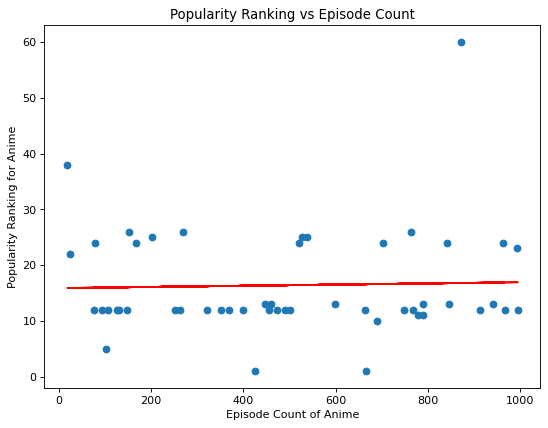

In [221]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

intercept = model.intercept_
slope = model.coef_
X = list(map(float,x))
Y = list(map(float,y))
mymodel = list(map(myfunc, X))
#plt.plot(X,Y, color = "red")
plt.scatter(X, Y)
plt.plot(X, mymodel, color='red')
plt.title("Popularity Ranking vs Episode Count")
plt.ylabel("Popularity Ranking for Anime")
plt.xlabel("Episode Count of Anime")
plt.show()